In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
# carrega o dataset
df = pd.read_csv("dataset.csv")
df.index = pd.to_datetime(df["id"], errors="ignore")

C:\Users\lucas\AppData\Local\Temp\ipykernel_21664\1432928690.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = pd.to_datetime(df["id"], errors="ignore")


In [9]:
# inserção das colunas que vão para o treinamento
cols = [
    "press",
    "humid",
    "temp",
    "ws100",
    "verts100",
    "wdir100",
    "cis5",
    "cis6",
    "cis7",
    "cis8",
    "wdisp100",
    "vertdisp100",
]
df_for_training = df[cols].astype(float)

In [10]:
# oor enquanto estou usando o StardardScaler msm
scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [11]:
# aqui defino a quantidade de dados para realizar a previsão
sequence_length = 36
X, y = [], []

for i in range(len(df_for_training_scaled) - sequence_length):
    X.append(df_for_training_scaled[i : i + sequence_length])
    y.append(df_for_training_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

print(f"Formato de X: {X.shape}")
print(f"Formato de y: {y.shape}")

Formato de X: (7525, 36, 12)
Formato de y: (7525, 12)


In [12]:
# divião de dados de treinamento e teste. 80% treinamento, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
# definição do modelo
model1 = Sequential(
    [
        InputLayer(shape=(sequence_length, len(cols))),
        LSTM(256),
        Dense(len(cols), activation="linear"),
    ]
)

model1.compile(optimizer="adam", loss="mse")
cp1 = ModelCheckpoint("model1.keras", save_best_only=True)

In [ ]:
# treinamento
model1.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[cp1]
)

# faz a previsão baseado no modelo criado
y_pred = model1.predict(X_test)

Epoch 1/15
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3496

In [ ]:
# renormalização dos dados
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

Formato de X: (7525, 36, 13)
Formato de y: (7525, 13)
Epoch 1/15


C:\Users\lucas\AppData\Local\Temp\ipykernel_21664\4233620208.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = pd.to_datetime(df['id'], errors='ignore')


189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.4065 - val_loss: 0.3021
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.2440 - val_loss: 0.2789
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.2327 - val_loss: 0.2684
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.2088 - val_loss: 0.2662
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.2123 - val_loss: 0.2658
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1998 - val_loss: 0.2622
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1961 - val_loss: 0.2614
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1984 - val_loss: 0.2551
Epoch 9/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1980 - val_loss: 0.2622
Epoch 10/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1909 - val_loss: 0.2552
Epoch 11/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1956 - val_loss: 0.2595
Epoch 12/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/ste

C:\Users\lucas\AppData\Local\Temp\ipykernel_21664\4233620208.py:66: RuntimeWarning: divide by zero encountered in divide
  erro_relativo = np.mean(np.abs((y_test_orig[:, i] - y_pred_orig[:, i]) / y_test_orig[:, i])) * 100


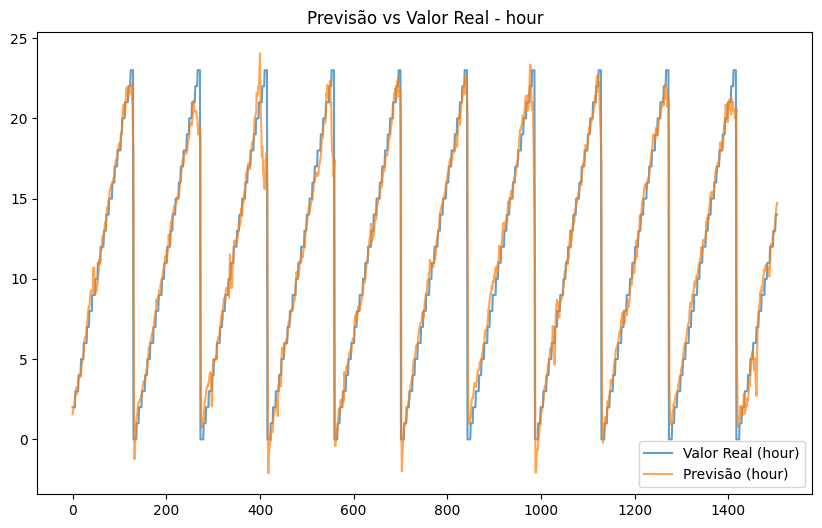

'press': RMSE = 0.3744, NRMSE = 0.0468, Erro Relativo = 0.03%


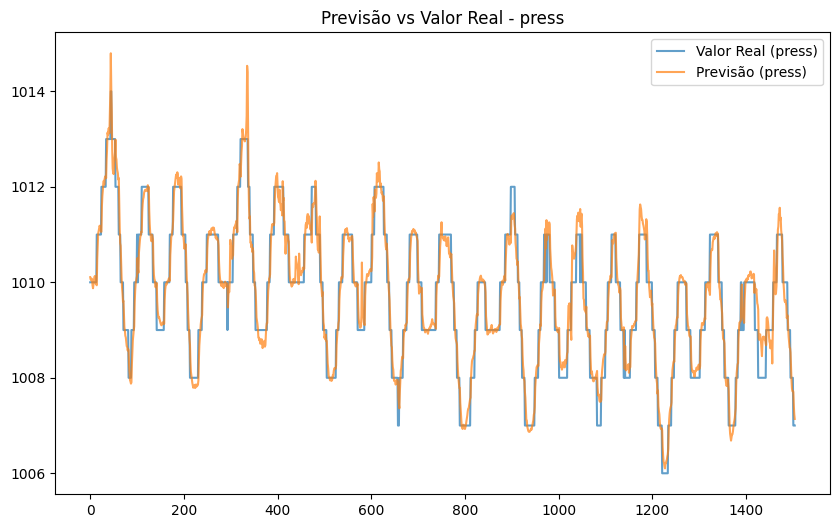

'humid': RMSE = 1.4721, NRMSE = 0.0387, Erro Relativo = 1.42%


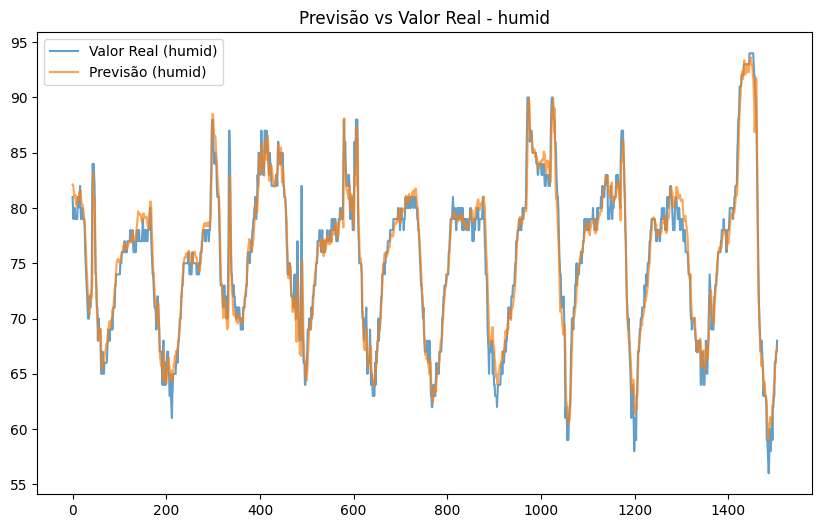

'temp': RMSE = 0.2962, NRMSE = 0.0357, Erro Relativo = 0.71%


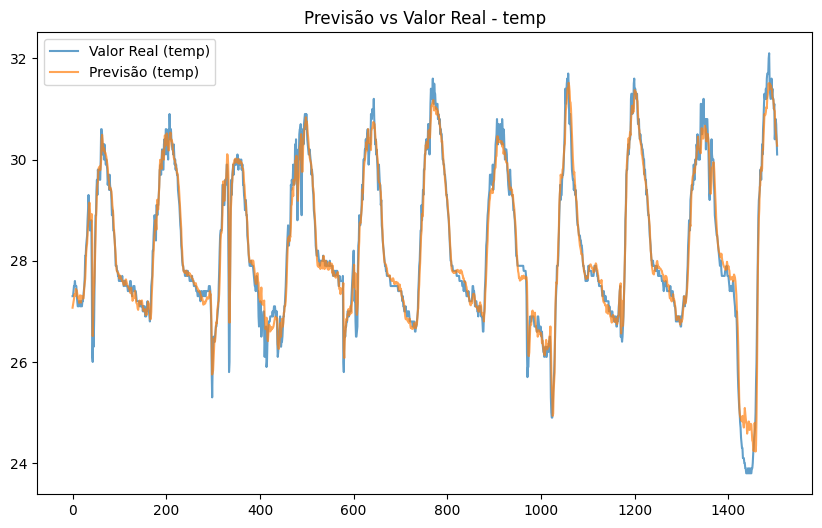

'ws100': RMSE = 0.5996, NRMSE = 0.0616, Erro Relativo = 6.05%


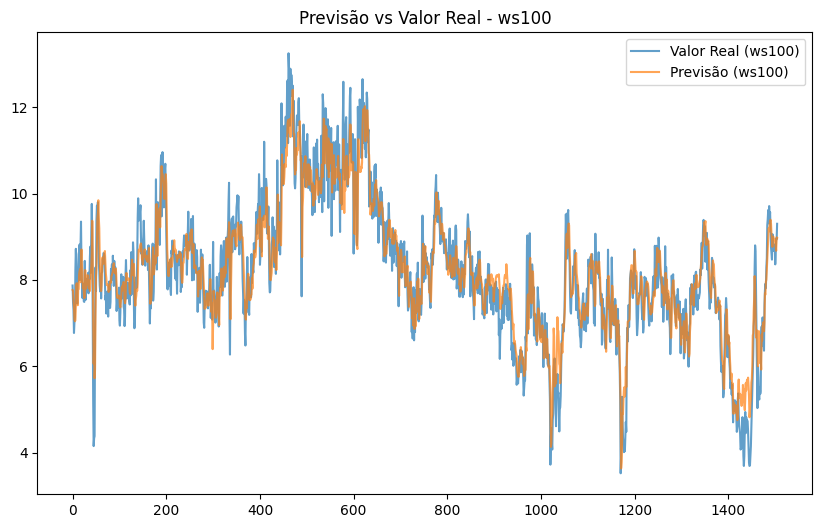

'verts100': RMSE = 0.2657, NRMSE = 0.0703, Erro Relativo = inf%


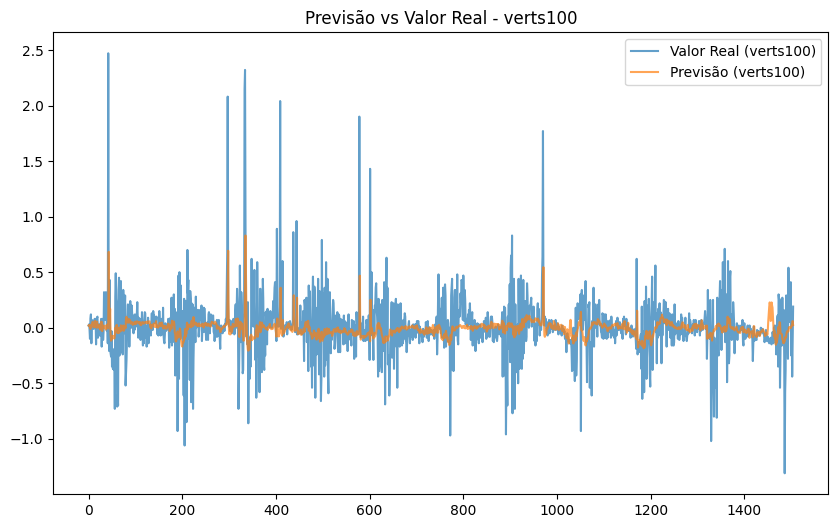

'wdir100': RMSE = 5.8108, NRMSE = 0.0443, Erro Relativo = 9.46%


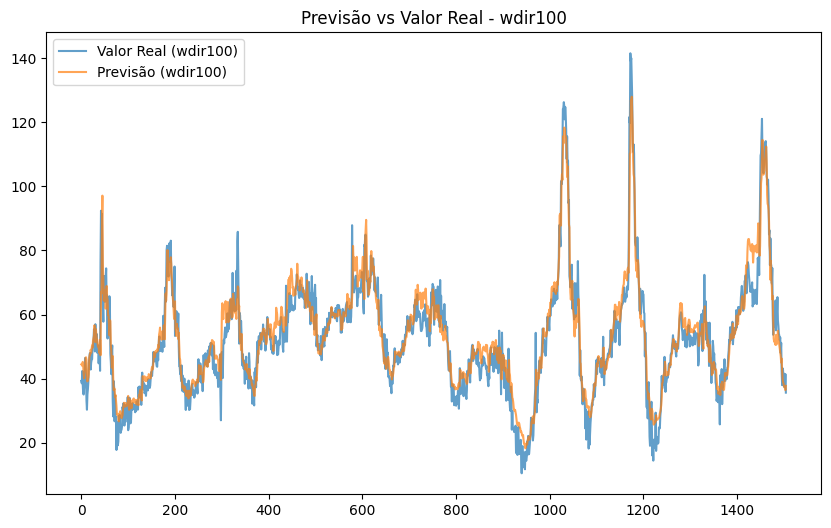

'cis5': RMSE = 0.0054, NRMSE = 0.0687, Erro Relativo = inf%


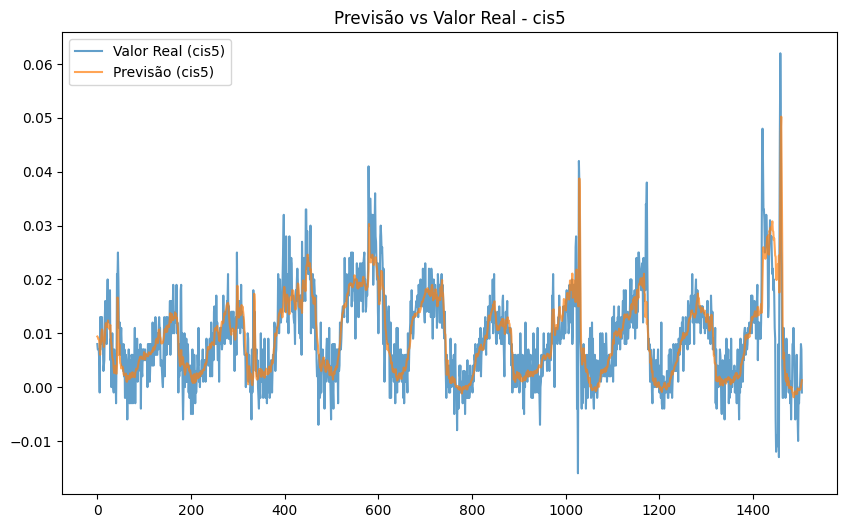

'cis6': RMSE = 0.0051, NRMSE = 0.0595, Erro Relativo = inf%


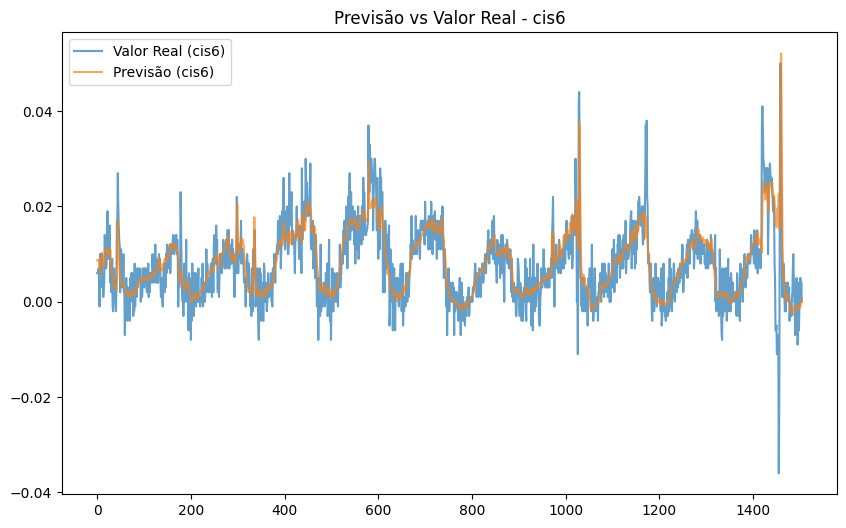

'cis7': RMSE = 0.0047, NRMSE = 0.0552, Erro Relativo = inf%


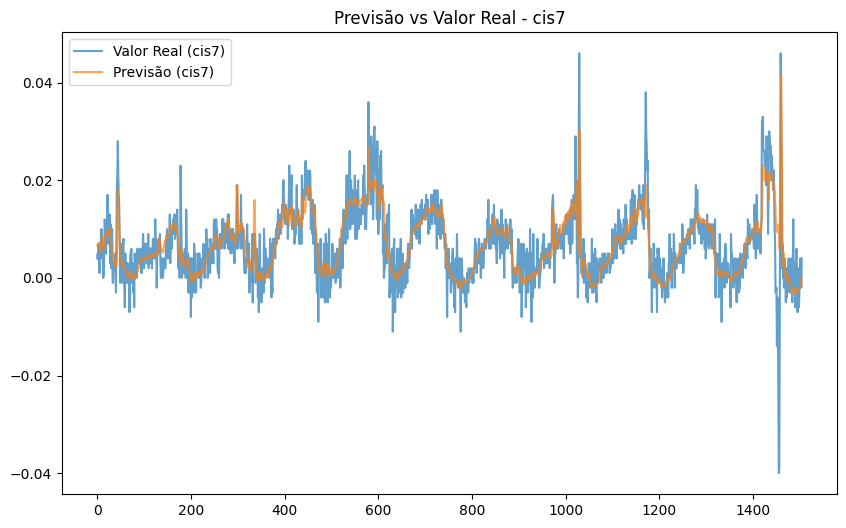

'cis8': RMSE = 0.0042, NRMSE = 0.0552, Erro Relativo = 9345291646428754.00%


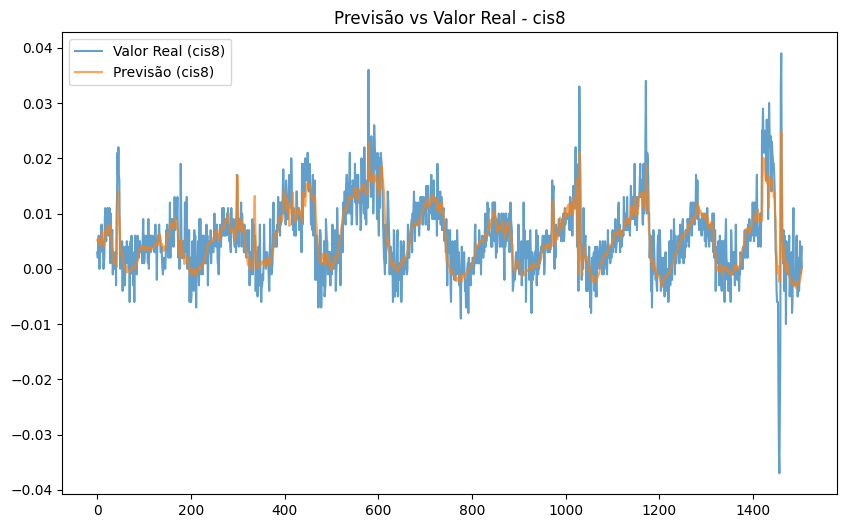

'wdisp100': RMSE = 0.1617, NRMSE = 0.0774, Erro Relativo = 15.38%


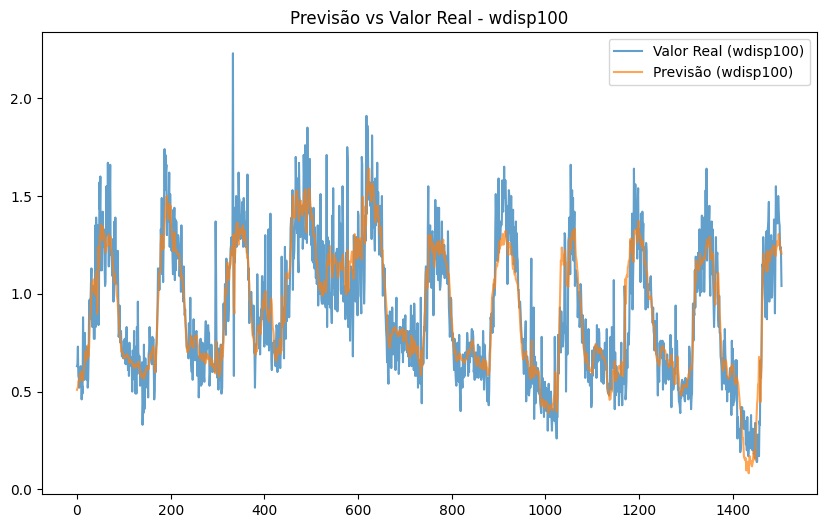

'vertdisp100': RMSE = 0.1438, NRMSE = 0.0645, Erro Relativo = 20.67%


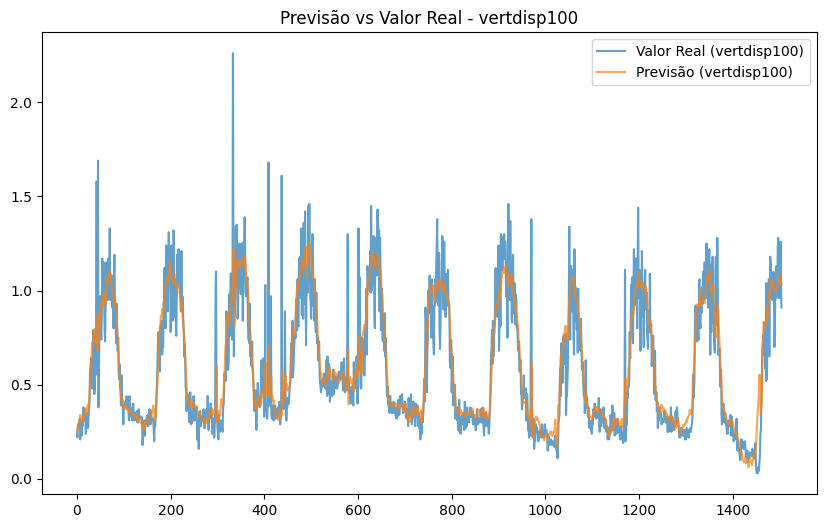


Correlação de cada variável com 'ws100':
hour           0.027247
press          0.072361
humid         -0.433935
temp           0.263363
ws100          1.000000
verts100       0.048717
wdir100        0.152831
cis5           0.108953
cis6           0.082937
cis7           0.062638
cis8           0.044065
wdisp100       0.558741
vertdisp100    0.365820
Name: ws100, dtype: float64


In [6]:
# verificações: RMSE, NRMSE, erro relativo e disposição dos gráficos
for i, col in enumerate(cols):
    # RMSE e NRMSE
    rmse = np.sqrt(np.mean((y_test_orig[:, i] - y_pred_orig[:, i]) ** 2))
    nrmse = rmse / (y_test_orig[:, i].max() - y_test_orig[:, i].min())

    # erro relativo médio
    erro_relativo = (
        np.mean(np.abs((y_test_orig[:, i] - y_pred_orig[:, i]) / y_test_orig[:, i]))
        * 100
    )

    print(
        f"'{col}': RMSE = {rmse:.4f}, NRMSE = {nrmse:.4f}, Erro Relativo = {erro_relativo:.2f}%"
    )

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_orig[:, i], label=f"Valor Real ({col})", alpha=0.7)
    plt.plot(y_pred_orig[:, i], label=f"Previsão ({col})", alpha=0.7)
    plt.legend()
    plt.title(f"Previsão vs Valor Real - {col}")
    plt.show()

In [ ]:
# análise de correlação entre variáveis e 'ws100'
correlations = df_for_training.corr(method="pearson")
print("\nCorrelação de cada variável com 'ws100':")
print(correlations["ws100"])